## TIISingleQubit Manual Characterisation and Calibration


In [1]:
import tii_single_qubit_diagnosis as diagnostics

# diagnostics.tiisq.pi_pulse_length = 50
# diagnostics.tiisq.pi_pulse_gain = 0.5

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/113301, firmware:4.2.76.0-4.30.046.295) in 0.03s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/113300, firmware:4.2.76.0-4.30.046.295) in 0.03s


Starting iterative measurement...
100% completed | elapsed time:     17s | time left:      0s  
100% completed | elapsed time:     17s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     21s | time left:      0s  
100% completed | elapsed time:     21s | time left:      0s  

Resonator Frequency = 7798070000.0
Maximum Voltage Measured = 893.0079834480067 μV


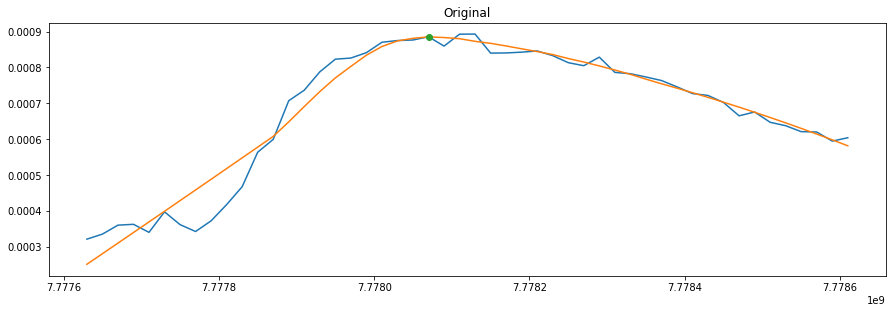

In [5]:
dataset = diagnostics.run_resonator_spectroscopy()


Starting iterative measurement...
100% completed | elapsed time:     53s | time left:      0s  
100% completed | elapsed time:     53s | time left:      0s  8922000000.0
Qubit Frequency = 8722000000.0


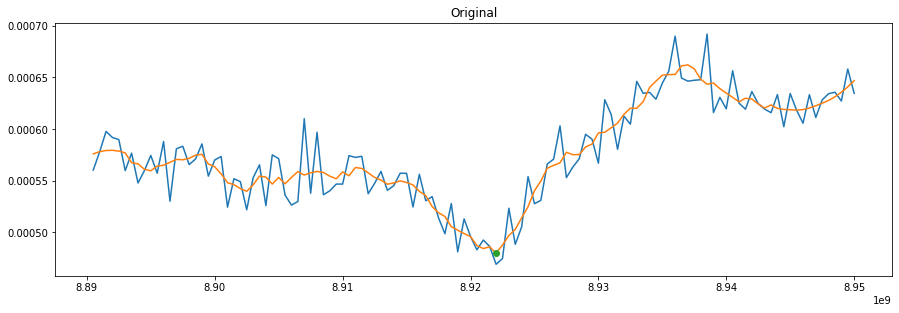

In [6]:
dataset = diagnostics.run_qubit_spectroscopy()


In [7]:
diagnostics.run_Rabi_pulse_length()


Starting iterative measurement...
  5% completed | elapsed time:      8s | time left:    153s  

[!!!] 1 interruption(s) signaled. Stopping after this iteration/batch.
[Send 4 more interruptions to forcestop (not safe!)].

  5% completed | elapsed time:      9s | time left:    151s  
Interrupt signaled, exiting gracefully...


KeyboardInterrupt: Measurement interrupted

In [ ]:
diagnostics.run_Rabi_pulse_gain()


In [ ]:
diagnostics.run_Rabi_pulse_length_and_gain()


In [ ]:
diagnostics.run_Rabi_pulse_length_and_amplitude()

In [ ]:
diagnostics.run_t1()


In [ ]:
diagnostics.run_ramsey()


In [ ]:
diagnostics.run_spin_echo()

## TIISingleQubit Pulse Sequence Execution

In [ ]:
from qibolab.platforms.tii_single_qubit import TIISingleQubit
from qibolab.circuit import PulseSequence
from qibolab.pulses import BasicPulse, Gaussian, IQReadoutPulse
platform = TIISingleQubit()

calibration_settings = platform.calibration_settings()
qc_pulse = BasicPulse(
    channel = 0,
    start = 0,
    duration = calibration_settings['pi_pulse_duration'],
    amplitude = calibration_settings['pi_pulse_amplitude'],
    frequency = calibration_settings['qc_frequency'],
    phase = 0,
    shape = Gaussian(calibration_settings['pi_pulse_duration']/5)
    )
ro_pulse = IQReadoutPulse(
    channel = 1,
    start = calibration_settings['pi_pulse_duration'] + 4,
    duration = calibration_settings['ro_pulse_duration'],
    amplitude = calibration_settings['ro_pulse_amplitude'],
    frequency = calibration_settings['ro_frequency'],
    phases = 0)
pulse_sequence = PulseSequence([qc_pulse, ro_pulse],) # pulses, duration=experiment.default_pulse_duration, sample_size=experiment.default_sample_size, fixed_readout=True, time_offset=experiment.readout_pulse_duration() + 1e-6):

result = platform.execute(pulse_sequence, nshots = 1000)

In [ ]:
import tii_single_qubit_diagnosis as diagnostics
diagnostics.tiisq.load_default_settings()
diagnostics.tiisq.save_settings_to_file()
diagnostics.tiisq.load_settings_from_file()

In [ ]:
diagnostics.tiisq.load_settings_from_file()

In [ ]:
diagnostics.tiisq.save_settings_to_file()